# Practice Problems
## Lesson 6: Regression
---
Created by Terron Ishihara, Modified by Univerisity of Washington, AI4All, 2020

# Problem 1

Let's explore regression using scikit-learn. We'll use a [dataset on diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html), with 442 samples and 10 different features. We will focus on using a single feature, body mass index. The target values are a quantitative measure of diabetes progression one year after baseline.

> To start, we import the models, the dataset, and some extra tools.

In [0]:
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
# Get the data samples and extract the feature at index 2,
# which is body mass index
X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

> Now we can split our dataset into training and test sets. The `train_test_split()` method can do this for us. Here we use an 80/20 split. Then we create the regression classifiers, train them on the training set, and evaluate the models on the test set, printing out the mean squared error. 

In [0]:
# Partition the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

# Instantiate the classifiers
lin_clf = LinearRegression()
# The parameters here are the default values for LogisticRegression,
# included here just to suppress a couple warnings
log_clf = LogisticRegression(solver='lbfgs', multi_class='multinomial')

# Train the classifiers
lin_clf.fit(X_train, y_train)
log_clf.fit(X_train, y_train)

# Calculate predictions on test set
lin_predictions = lin_clf.predict(X_test)
log_predictions = log_clf.predict(X_test)

> To get a better idea of what these models look like, let's plot the models' predictions on top of the test set.

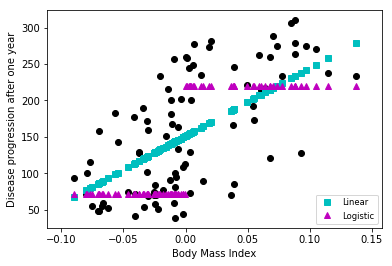

In [0]:
import matplotlib.pyplot as plt

# Plot the dataset points
plt.scatter(X_test, y_test, color='black')

# Plot the linear regression predictions
# 'cs' means cyan is the color, square is the shape
plt.plot(X_test, lin_predictions, 'cs')

# Plot the logistic regression predictions
# 'm^' means magenta is the color, triangle is the shape
plt.plot(X_test, log_predictions, 'm^')

# Label axes and legend
plt.xlabel("Body Mass Index")
plt.ylabel("Disease progression after one year")
plt.legend(('Linear', 'Logistic'),
           loc="lower right", fontsize='small')
# Show the plot
plt.show()

> Recall the formula for the error function of our linear regression model, as an example: $w_1x+w_0-y$. We take the input, $x$, place it into our linear model, $w_1x+w_0$, and subtract the true value, $y$. A useful measure of how closely our model predicts all the test samples is Mean Squared Error (MSE). We simply square all of our error values, sum those squares, then divide by $N$ to calculate the mean squared error:

>> $\frac{1}{N}\sum_{i=1}^N (w_1x+w_0-y)^2$

> The logistic regression model has the same calculation for MSE, but with the sigmoid function as the model: $\frac{1}{1+e^{-(w_1x+w_0)}}$.

> Given the above plot, which regression classifier do you think has a larger mean squared error? Check your answer by printing out the values below.

In [0]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(lin_predictions, y_test)
log_mse = mean_squared_error(log_predictions, y_test)